<a href="https://colab.research.google.com/github/sindhu7-zero/fish_classifier/blob/main/Fish_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!cp '/content/drive/MyDrive/fish_project/fish_dataset.zip' /content/
!unzip '/content/fish_dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KF3D8XIXVZOD.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KWS8S1W9I9PG.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LRPEM4RGWRY7.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/ZHYP7L0380A5.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LA6K9A1Z300T.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/DSTJ0FNZ17NI.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/8HEN19LAPJGS.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/7UQQICO4NVWK.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/OKKCEF9K4K64.jpg  
  in

In [2]:
import os

# Rename the weird folder to something simple
os.rename(
    '/content/images.cv_jzk6llhf18tm3k0kyttxz',
    '/content/fish_project'
)
print("✅ Renamed to /content/fish_project")

✅ Renamed to /content/fish_project


In [3]:
!ls '/content/fish_project/data'

test  train  val


In [4]:
train_path = '/content/fish_project/data/train'
val_path = '/content/fish_project/data/val'
test_path = '/content/fish_project/data/test'

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
#load data
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [8]:
model=Sequential()

# Block 1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 4
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(train_gen.class_indices),activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,404,683 (169.39 MB)

 Trainable params: 44,403,211 (169.38 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [9]:
model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 40s 140ms/step - accuracy: 0.5468 - loss: 1.6209 - val_accuracy: 0.1071 - val_loss: 14.5889
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.8404 - loss: 0.4518 - val_accuracy: 0.2024 - val_loss: 11.8098
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9331 - loss: 0.2232 - val_accuracy: 0.5998 - val_loss: 2.3222
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.9569 - loss: 0.1475 - val_accuracy: 0.8086 - val_loss: 1.2255
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9728 - loss: 0.0919 - val_accuracy: 0.8581 - val_loss: 1.0966
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.9844 - loss: 0.0639 - val_accuracy: 0.8663 - val_loss: 0.9279
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9886 - loss: 0.0435 - val_accuracy: 0.8718 - val_loss: 0.7791
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9896 - loss: 0.0406 - val_accu

In [10]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc:.2f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8854 - loss: 1.2877
✅ Test Accuracy: 0.91


In [11]:
model.save('/content/fish_classifier.h5')

In [12]:
!cp /content/fish_classifier.h5 "/content/drive/MyDrive/fish_project/"


In [13]:
!ls "/content/drive/MyDrive/fish_project/"


fish_classifier.h5  fish_dataset.zip


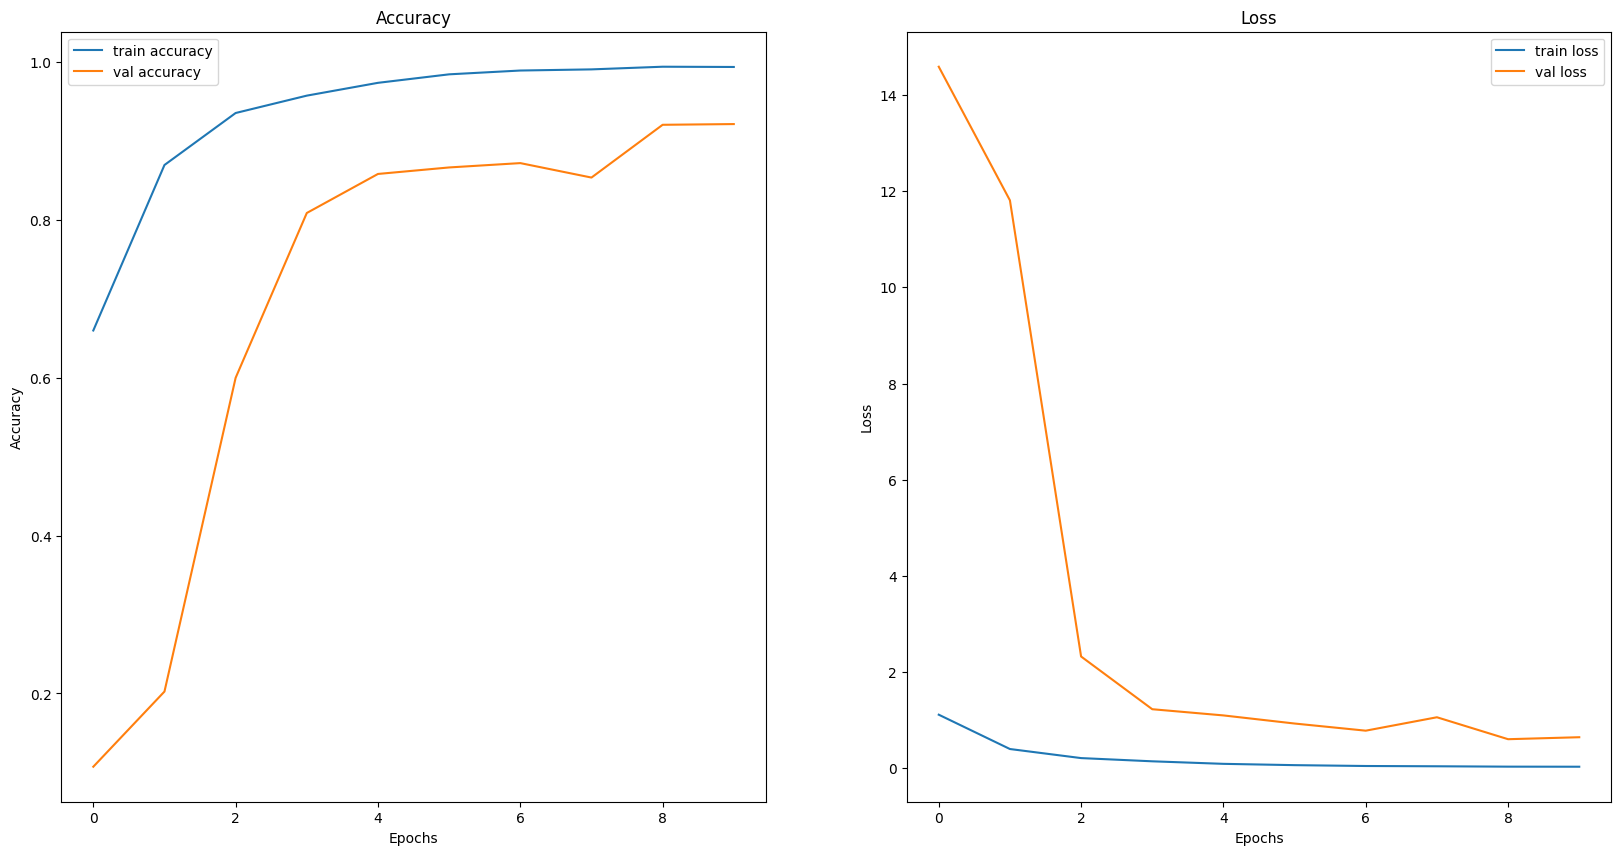

In [14]:
# Visuvalaisation of the model
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(model.history.history['accuracy'],label='train accuracy')
plt.plot(model.history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(model.history.history['loss'],label='train loss')
plt.plot(model.history.history['val_loss'],label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
train_dir = '/content/fish_project/data/train'
val_dir = '/content/fish_project/data/val'

# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
num_classes = len(train_gen.class_indices)
print(f"✅ Found {num_classes} classes")

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
✅ Found 11 classes


In [16]:
# List of models to try
model_configs = [
    ("MobileNetV2", MobileNetV2),
    ("ResNet50", ResNet50),
    ("EfficientNetB0", EfficientNetB0),
    ("DenseNet121", DenseNet121),
    ("VGG16", VGG16)
]

results = {}

for name, BaseModel in model_configs:
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")

    # Build model
    base_model = BaseModel(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    base_model.trainable = False  # Freeze base

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    # Compile
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train (just 5 epochs for comparison)
    history = model.fit(
        train_gen,
        epochs=5,
        validation_data=val_gen,
        verbose=1
    )

    # Evaluate on full validation set
    val_loss, val_acc = model.evaluate(val_gen, verbose=0)
    results[name] = val_acc

    # Save model (optional)
    model.save(f'/content/{name}_fish_classifier.h5')

    print(f"✅ {name} - Validation Accuracy: {val_acc:.4f}")




Training MobileNetV2...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 124s 543ms/step - accuracy: 0.4928 - loss: 1.5863 - val_accuracy: 0.9441 - val_loss: 0.2499
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 415ms/step - accuracy: 0.8823 - loss: 0.3728 - val_accuracy: 0.9588 - val_loss: 0.1498
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 78s 400ms/step - accuracy: 0.9270 - loss: 0.2367 - val_accuracy: 0.9679 - val_loss: 0.1092
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 397ms/step - accuracy: 0.9365 - loss: 0.1939 - val_accuracy: 0.9661 - val_loss: 0.1042
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 392ms/step - accuracy: 0.9499 - loss: 0.1561 - val_accuracy: 0.9698 - val_loss: 0.0801


✅ MobileNetV2 - Validation Accuracy: 0.9698

Training ResNet50...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 109s 492ms/step - accuracy: 0.1261 - loss: 2.5913 - val_accuracy: 0.1712 - val_loss: 2.2251
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 428ms/step - accuracy: 0.1823 - loss: 2.2770 - val_accuracy: 0.2637 - val_loss: 2.1773
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 428ms/step - accuracy: 0.2050 - loss: 2.2090 - val_accuracy: 0.1969 - val_loss: 2.1278
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 434ms/step - accuracy: 0.2038 - loss: 2.1699 - val_accuracy: 0.2390 - val_loss: 2.0881
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 426ms/step - accuracy: 0.2147 - loss: 2.1544 - val_accuracy: 0.2692 - val_loss: 2.0732


✅ ResNet50 - Validation Accuracy: 0.2692

Training EfficientNetB0...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 129s 542ms/step - accuracy: 0.1360 - loss: 2.3670 - val_accuracy: 0.1712 - val_loss: 2.3258
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 411ms/step - accuracy: 0.1598 - loss: 2.3360 - val_accuracy: 0.1712 - val_loss: 2.3240
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 78s 400ms/step - accuracy: 0.1592 - loss: 2.3549 - val_accuracy: 0.1712 - val_loss: 2.3355
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 78s 400ms/step - accuracy: 0.1421 - loss: 2.3309 - val_accuracy: 0.1712 - val_loss: 2.3193
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 408ms/step - accuracy: 0.1697 - loss: 2.3214 - val_accuracy: 0.1712 - val_loss: 2.3416


✅ EfficientNetB0 - Validation Accuracy: 0.1712

Training DenseNet121...
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 147s 609ms/step - accuracy: 0.3363 - loss: 2.2214 - val_accuracy: 0.9203 - val_loss: 0.4614
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 435ms/step - accuracy: 0.7675 - loss: 0.6983 - val_accuracy: 0.9615 - val_loss: 0.2368
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 87s 444ms/step - accuracy: 0.8557 - loss: 0.4603 - val_accuracy: 0.9753 - val_loss: 0.1723
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 429ms/step - accuracy: 0.8839 - loss: 0.3722 - val_accuracy: 0.9826 - val_loss: 0.1289
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 428ms/step - accuracy: 0.8892 - loss: 0.3325 - val_accuracy: 0.9744 - val_loss: 0.1214


✅ DenseNet121 - Validation Accuracy: 0.9744

Training VGG16...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 118s 535ms/step - accuracy: 0.1770 - loss: 2.3976 - val_accuracy: 0.5678 - val_loss: 1.7908
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 470ms/step - accuracy: 0.4316 - loss: 1.7898 - val_accuracy: 0.6731 - val_loss: 1.5135
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 472ms/step - accuracy: 0.5417 - loss: 1.5649 - val_accuracy: 0.7381 - val_loss: 1.3342
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 473ms/step - accuracy: 0.5948 - loss: 1.4175 - val_accuracy: 0.7537 - val_loss: 1.2013
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 94s 481ms/step - accuracy: 0.6502 - loss: 1.2905 - val_accuracy: 0.7729 - val_loss: 1.0994


✅ VGG16 - Validation Accuracy: 0.7729



🏆 Final Validation Accuracies:
DenseNet121     : 0.9744
MobileNetV2     : 0.9698
VGG16           : 0.7729
ResNet50        : 0.2692
EfficientNetB0  : 0.1712


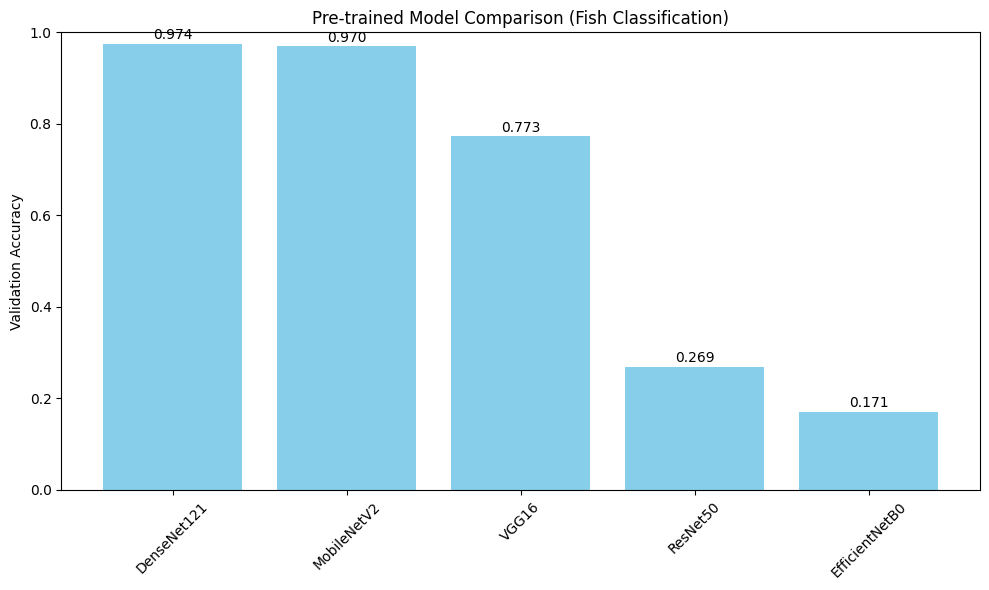

In [17]:
import matplotlib.pyplot as plt

# Sort by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("\n🏆 Final Validation Accuracies:")
for name, acc in sorted_results:
    print(f"{name:15} : {acc:.4f}")

# Plot
names = [r[0] for r in sorted_results]
accs = [r[1] for r in sorted_results]

plt.figure(figsize=(10, 6))
plt.bar(names, accs, color='skyblue')
plt.title('Pre-trained Model Comparison (Fish Classification)')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, v in enumerate(accs):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
plt.show()

In [18]:
!cp /content/DenseNet121_fish_classifier.h5 "/content/drive/MyDrive/fish_project/"

In [19]:
!cp /content/EfficientNetB0_fish_classifier.h5 "/content/drive/MyDrive/fish_project/"

In [20]:
!cp /content/MobileNetV2_fish_classifier.h5 "/content/drive/MyDrive/fish_project/"

In [21]:
!cp /content/ResNet50_fish_classifier.h5 "/content/drive/MyDrive/fish_project/"

In [22]:
!cp /content/VGG16_fish_classifier.h5 "/content/drive/MyDrive/fish_project/"

In [23]:
!ls "/content/drive/MyDrive/fish_project/"

DenseNet121_fish_classifier.h5	   MobileNetV2_fish_classifier.h5
EfficientNetB0_fish_classifier.h5  ResNet50_fish_classifier.h5
fish_classifier.h5		   VGG16_fish_classifier.h5
fish_dataset.zip
